# Minimizing Churn of Subscription Product Through Financial Habit Analysis

Market: The target audience is the entirety of a company's subscription base - who we want to keep
Product: The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten. 
Goal: The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. 
- These efforts can be email reminders about the benefits of the product, especially focusing on features that are new tor that the user has shown to value. 

In this Case Study we're working for a fintech company that provides a subscription product to its users, which allows them to manage their bank accounts, provides them with personalized coupons, informs them of the latest low-APR loans, and educates them on best methods to save money. We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. 

Data
- Finance Data
- Product Finance Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sn

In [2]:
churn_data = pd.read_csv('./data/churn_data.csv')
churn_data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
churn_data.info

<bound method DataFrame.info of         user  churn   age housing  credit_score  deposits  withdrawal  \
0      55409      0  37.0      na           NaN         0           0   
1      23547      0  28.0       R         486.0         0           0   
2      58313      0  35.0       R         561.0        47           2   
3       8095      0  26.0       R         567.0        26           3   
4      61353      1  27.0      na           NaN         0           0   
...      ...    ...   ...     ...           ...       ...         ...   
26995  24291      1  24.0       R         580.0         0           0   
26996   4116      1  26.0      na           NaN         0           0   
26997  23740      0  22.0      na           NaN         0           0   
26998  47663      1  46.0      na         529.0         2           0   
26999  52752      1  34.0      na         525.0         0           0   

       purchases_partners  purchases  cc_taken  ...  waiting_4_loan  \
0                   

In [4]:
churn_data.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
churn_data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Removing Nulls

In [6]:
churn_data.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
churn_data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
churn_data = churn_data[pd.notnull(churn_data['age'])]

In [9]:
churn_data = churn_data.drop(columns = ['credit_score', 'rewards_earned'])

### Histograms

In [10]:
x = churn_data.drop(columns = ['user', 'churn'])

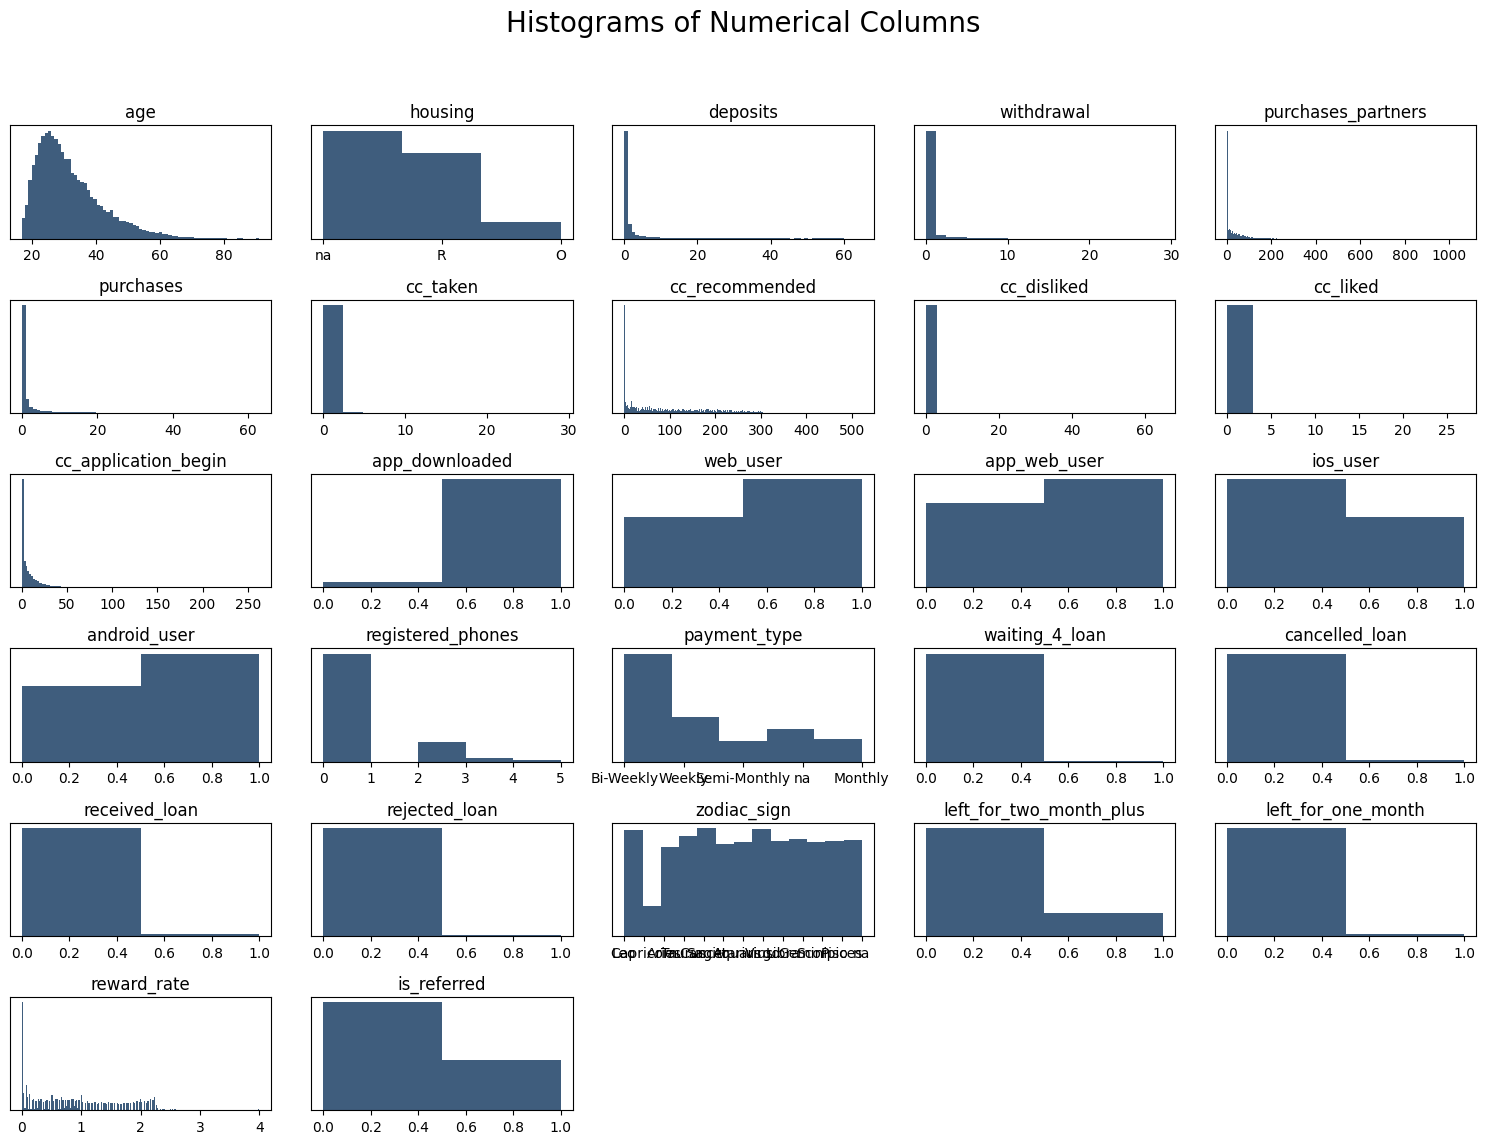

In [11]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, x.shape[1] + 1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(x.columns.values[i-1])
    
    vals = np.size(x.iloc[:, i - 1].unique())
    
    plt.hist(x.iloc[:,i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

### Pie Plots

In [12]:
x.columns

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'is_referred'],
      dtype='object')

In [13]:
def binary_column_check(df):
    for column in x.columns:
        print(f'Col:{column} has {x[column].nunique()} unique values.')
        if x[column].nunique() <= 5:
            print('============================================')
            print(f'This are the unique values in {column} {x[column].unique()}')
            print('============================================')
    return None

binary_column_check(x)

Col:age has 73 unique values.
Col:housing has 3 unique values.
This are the unique values in housing ['na' 'R' 'O']
Col:deposits has 66 unique values.
Col:withdrawal has 23 unique values.
Col:purchases_partners has 294 unique values.
Col:purchases has 64 unique values.
Col:cc_taken has 12 unique values.
Col:cc_recommended has 325 unique values.
Col:cc_disliked has 20 unique values.
Col:cc_liked has 9 unique values.
Col:cc_application_begin has 128 unique values.
Col:app_downloaded has 2 unique values.
This are the unique values in app_downloaded [1 0]
Col:web_user has 2 unique values.
This are the unique values in web_user [1 0]
Col:app_web_user has 2 unique values.
This are the unique values in app_web_user [1 0]
Col:ios_user has 2 unique values.
This are the unique values in ios_user [1 0]
Col:android_user has 2 unique values.
This are the unique values in android_user [0 1]
Col:registered_phones has 5 unique values.
This are the unique values in registered_phones [0 2 5 4 3]
Col:pay

In [14]:
def is_binary_column(series):
    unique_values = series.unique()
    if len(unique_values) <= 5:  # Adjust this condition as needed
        return True
    return False

def create_binary_list(df):
    new_list = []  

    for column in df.columns:  
        if is_binary_column(df[column]):
            print(f"Column '{column}' is binary: {is_binary_column(df[column])}")
            new_list.append(column)
    return new_list

binary_list = create_binary_list(x)


Column 'housing' is binary: True
Column 'app_downloaded' is binary: True
Column 'web_user' is binary: True
Column 'app_web_user' is binary: True
Column 'ios_user' is binary: True
Column 'android_user' is binary: True
Column 'registered_phones' is binary: True
Column 'payment_type' is binary: True
Column 'waiting_4_loan' is binary: True
Column 'cancelled_loan' is binary: True
Column 'received_loan' is binary: True
Column 'rejected_loan' is binary: True
Column 'left_for_two_month_plus' is binary: True
Column 'left_for_one_month' is binary: True
Column 'is_referred' is binary: True


In [15]:
print(binary_list)

['housing', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']


In [16]:
binary_x = x[binary_list]

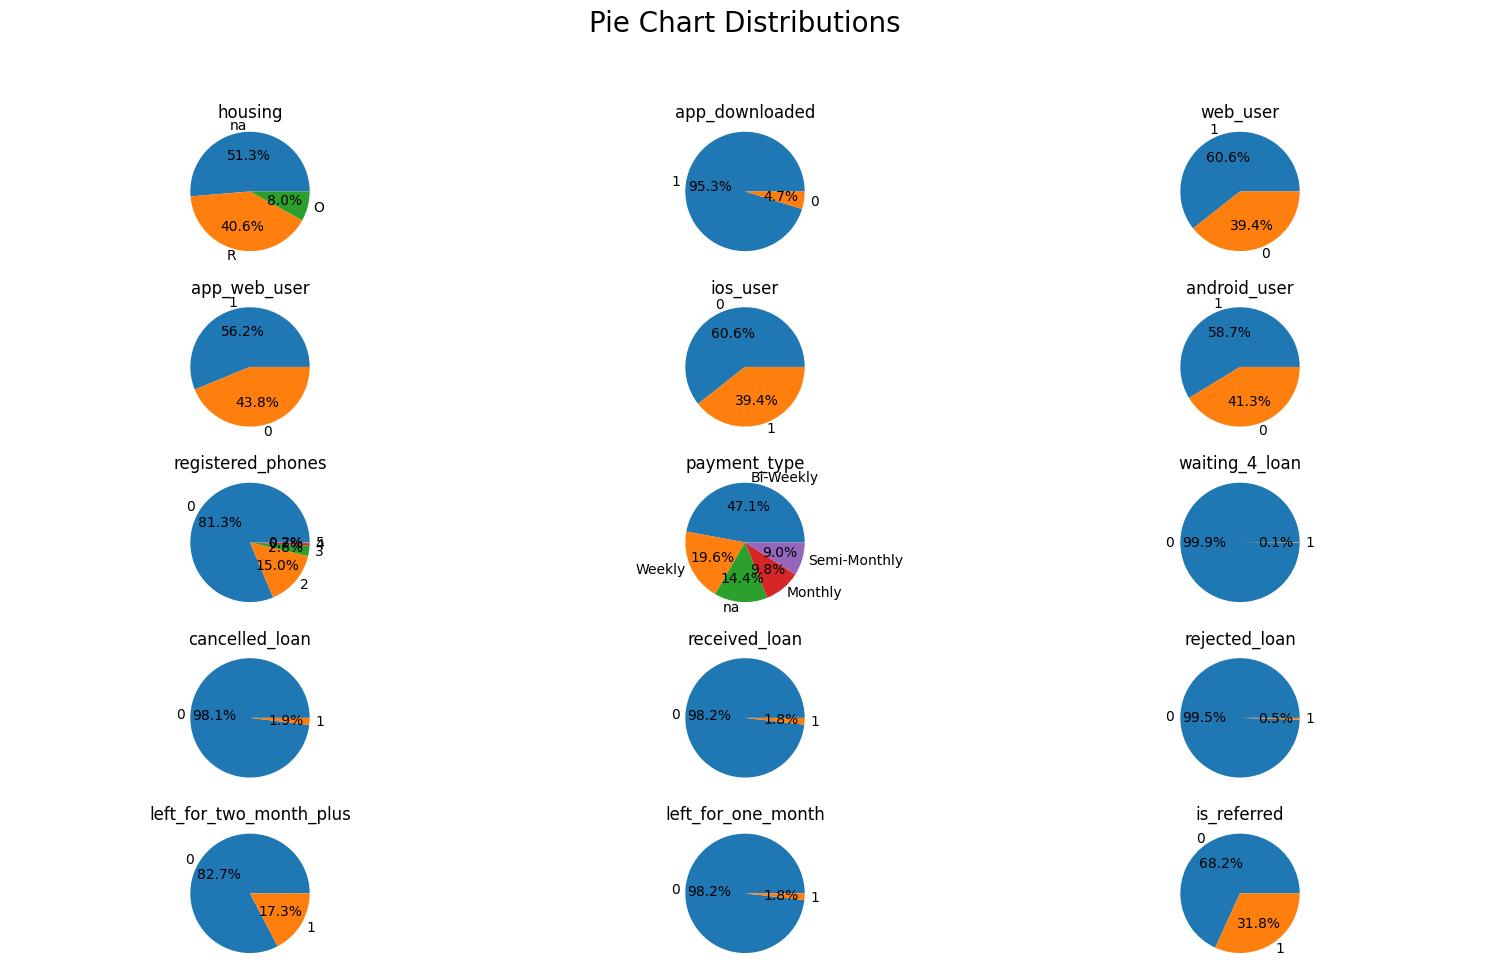

In [17]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, binary_x.shape[1] + 1):
    plt.subplot(6,3,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(binary_x.columns.values[i-1])
    
    vals = binary_x.iloc[:,i-1].value_counts(normalize=True).values
    index = binary_x.iloc[:,i-1].value_counts(normalize=True).index
    
    plt.pie(vals, labels=index, autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0,0.03,1,0.95])

There's some pie charts that contains column values with smaller subsets (aren't evenly balanced): waiting_4_loan, rejected loan, left_for_one_month cancelled_loan. Also considering registered phones.

### Column validation to see if binary columns with smaller subsets contain at least both values for that subset

In [18]:
churn_data[binary_x.waiting_4_loan == 1].churn.value_counts()

churn
0    27
1     8
Name: count, dtype: int64

In [19]:
churn_data[binary_x.cancelled_loan == 1].churn.value_counts()

churn
1    274
0    234
Name: count, dtype: int64

In [20]:
churn_data[binary_x.received_loan == 1].churn.value_counts()

churn
1    292
0    199
Name: count, dtype: int64

In [21]:
churn_data[binary_x.rejected_loan == 1].churn.value_counts()

churn
1    107
0     25
Name: count, dtype: int64

In [22]:
churn_data[binary_x.left_for_one_month == 1].churn.value_counts()

churn
1    266
0    222
Name: count, dtype: int64

### Correlations

<Axes: title={'center': 'Correlation with the Response Variable'}>

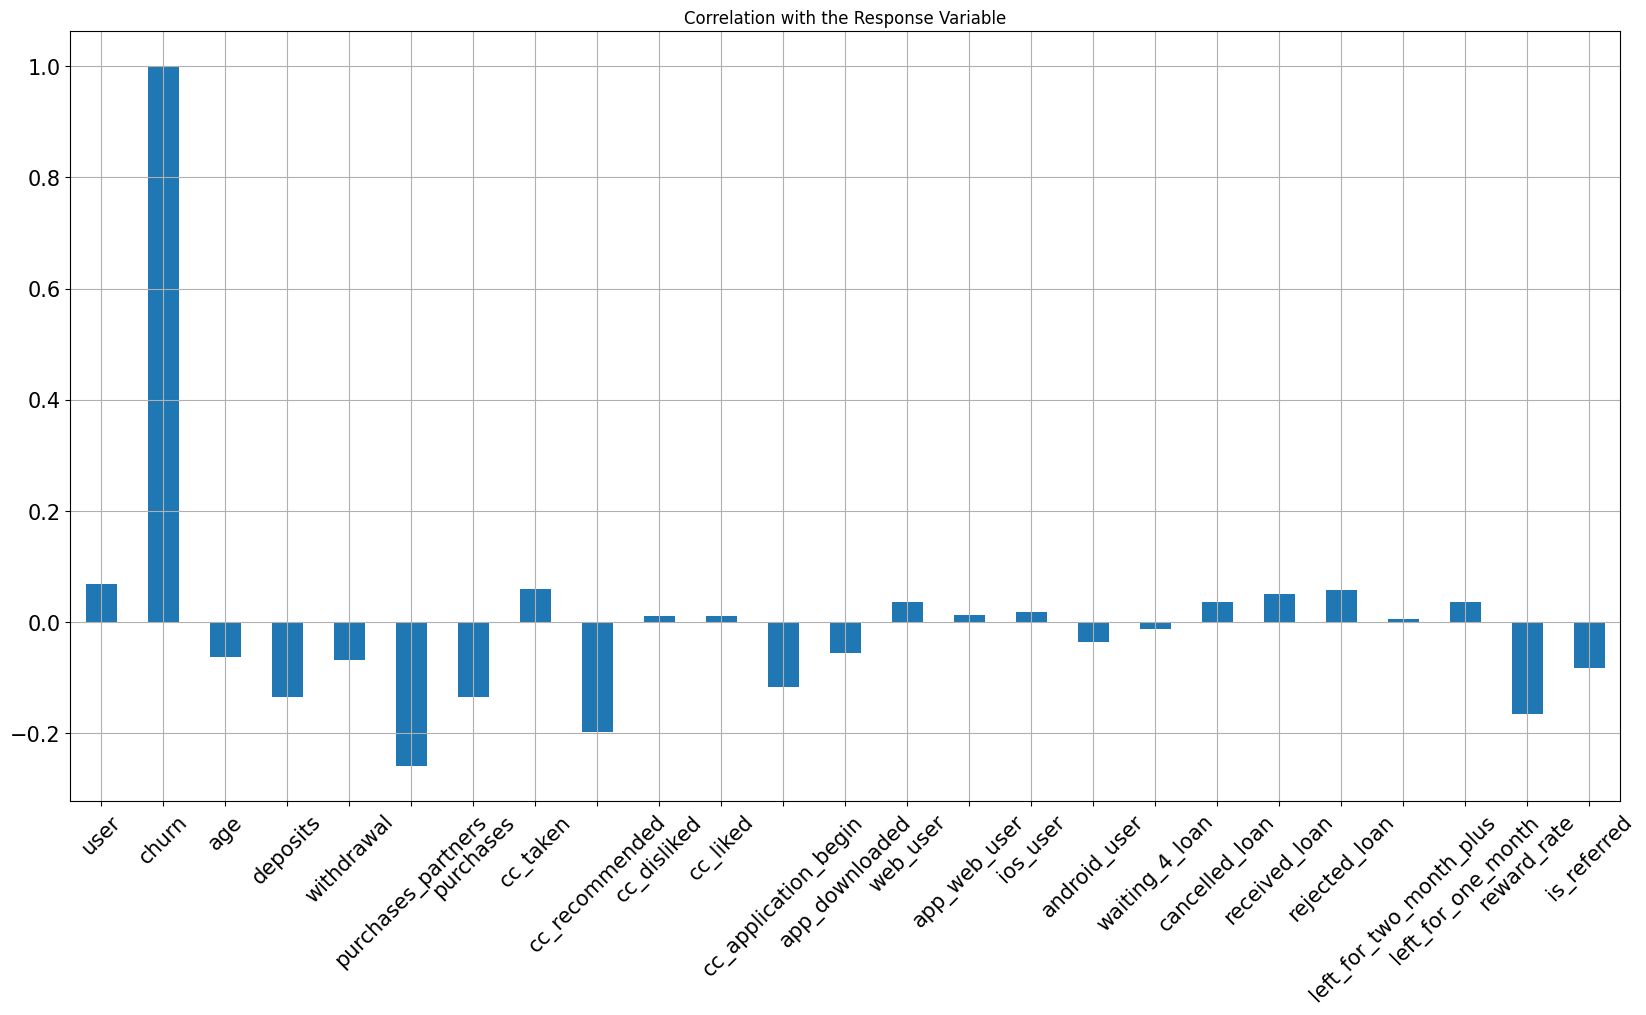

In [23]:
churn_data.drop(
    columns= ['housing', 'payment_type', 'registered_phones', 'zodiac_sign']
            ).corrwith(churn_data.churn).plot.bar(
                figsize=(20,10),
                title='Correlation with the Response Variable',
                fontsize=15,
                rot=45,
                grid=True
            )

In [24]:
## Correlation Matrix
sn.set(style="white")

churn_data.head()


,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


<Axes: >

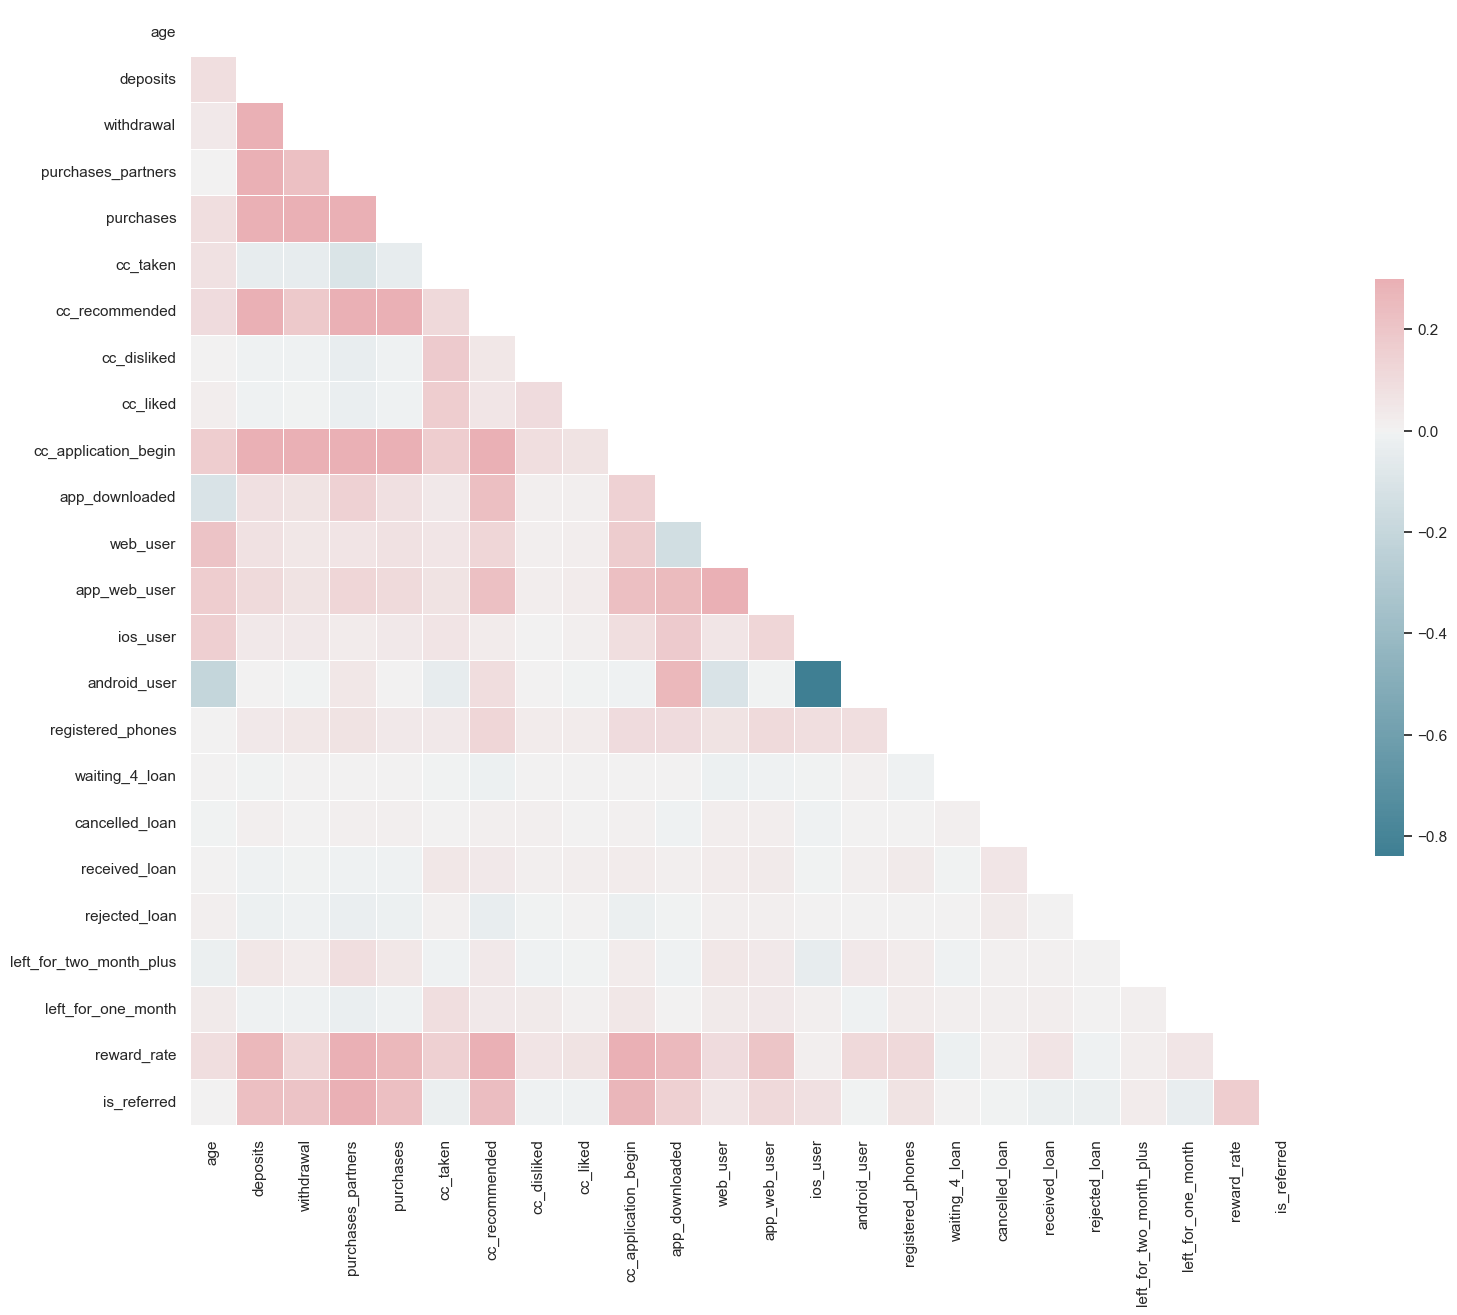

In [25]:
## Compute Correlation Matrix
corr = churn_data.drop(columns=['user', 'churn', 'housing', 'payment_type', 'zodiac_sign']).corr()

## Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

## Setup the matplotlib figure
f, ax = plt.subplots(figsize=(18,15))

## Generate a custom diverging colormap
cmap = sn.diverging_palette(220,10, as_cmap=True)

## Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    )


Almost 1:1 relationship between android_user and ios_user. Since correlation strong, may be better to remove one of them.

In [26]:
churn_data = churn_data.drop(columns=['app_web_user'])

In [27]:
churn_data.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [28]:
churn_data.to_csv('./data/transformed_churn_data.csv',index=False)

### One Hot Encoding: Purpose is to convert categorical variables into their own independent binary columns

In [29]:
## Data Prep
dataset = pd.read_csv('./data/transformed_churn_data.csv')
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

In [30]:
## One-Hot Encoding
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [31]:
dataset = dataset.drop(columns=['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [32]:
## Spliting the Dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X = dataset.drop(columns='churn')
y = dataset['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 0
    )

In [33]:
print(X_train)

        age  deposits  withdrawal  purchases_partners  purchases  cc_taken  \
11570  26.0         1           0                  49          1         0   
14315  25.0         0           0                  84          0         0   
11695  26.0         0           0                   2          0         0   
16711  22.0         0           0                  19          0         0   
19766  28.0         0           0                   0          0         0   
...     ...       ...         ...                 ...        ...       ...   
13123  21.0         0           0                   2          0         0   
19648  51.0         0           0                   0          0         0   
9845   31.0         3           1                  21          3         0   
10799  33.0         0           0                   9          0         0   
2732   40.0        41           2                  60         41         0   

       cc_recommended  cc_disliked  cc_liked  cc_application_be

In [34]:
print(y_train)

11570    0
14315    0
11695    1
16711    0
19766    1
        ..
13123    1
19648    0
9845     0
10799    0
2732     0
Name: churn, Length: 21596, dtype: int64


### Balancing the Training Set

In [35]:
y_train.value_counts()

churn
0    12656
1     8940
Name: count, dtype: int64

In [36]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [37]:
print(pos_index)

Index([11695, 19766,  8354, 17883, 25149,   730, 23229, 20076, 21014,  5559,
       ...
       24152, 18606, 10327, 18983, 17089, 15832, 14935, 20757, 24275, 13123],
      dtype='int64', length=8940)


In [38]:
if len(pos_index) > len(neg_index): 
    higher = pos_index
    lower = neg_index
else: 
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes ]

In [39]:
print(X_train)

        age  deposits  withdrawal  purchases_partners  purchases  cc_taken  \
11695  26.0         0           0                   2          0         0   
19766  28.0         0           0                   0          0         0   
8354   35.0         0           0                   0          0         0   
17883  38.0         0           0                  28          0         0   
25149  24.0         1           0                  22          1         0   
...     ...       ...         ...                 ...        ...       ...   
12974  29.0         0           0                  88          0         0   
9800   32.0        54           0                  65         53         0   
3863   31.0         2           0                  16          2         0   
22417  47.0        38           1                  30         37         0   
8022   19.0         0           0                  41          0         0   

       cc_recommended  cc_disliked  cc_liked  cc_application_be

In [40]:
print(y_train)

11695    1
19766    1
8354     1
17883    1
25149    1
        ..
12974    0
9800     0
3863     0
22417    0
8022     0
Name: churn, Length: 17880, dtype: int64


### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [42]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.626795,-0.359428,-0.29252,-0.600223,-0.359111,-0.170668,-0.916026,-0.061939,-0.069795,-0.566601,...,-0.314679,-0.160128,-0.29056,-0.312743,-0.294391,-0.298965,-0.286922,-0.295175,-0.294839,-0.311880
19766,-0.425850,-0.359428,-0.29252,-0.648956,-0.359111,-0.170668,0.313083,1.125053,-0.069795,-0.566601,...,-0.314679,-0.160128,-0.29056,-0.312743,3.396847,-0.298965,-0.286922,-0.295175,-0.294839,-0.311880
8354,0.277457,-0.359428,-0.29252,-0.648956,-0.359111,-0.170668,1.997416,-0.061939,-0.069795,-0.243255,...,-0.314679,-0.160128,-0.29056,-0.312743,-0.294391,-0.298965,-0.286922,-0.295175,-0.294839,3.206362
17883,0.578874,-0.359428,-0.29252,0.033312,-0.359111,-0.170668,-0.187665,-0.061939,-0.069795,-0.000746,...,-0.314679,-0.160128,-0.29056,-0.312743,-0.294391,-0.298965,-0.286922,-0.295175,3.391680,-0.311880
25149,-0.827740,-0.245427,-0.29252,-0.112888,-0.242887,-0.170668,-0.585987,-0.061939,-0.069795,-0.243255,...,-0.314679,-0.160128,-0.29056,-0.312743,-0.294391,3.344868,-0.286922,-0.295175,-0.294839,-0.311880


In [43]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.023961,0.894582,-0.292520,-0.624590,0.919353,2.012123,1.234914,-0.061939,-0.069795,1.858491,...,-0.314679,-0.160128,-0.290560,-0.312743,-0.294391,-0.298965,3.485263,-0.295175,-0.294839,-0.31188
1,-0.727267,-0.359428,-0.292520,2.469985,-0.359111,-0.170668,1.701520,-0.061939,-0.069795,-0.404928,...,-0.314679,-0.160128,3.441632,-0.312743,-0.294391,-0.298965,-0.286922,-0.295175,-0.294839,-0.31188
2,1.483126,0.894582,1.719119,-0.648956,0.919353,-0.170668,0.426889,2.312044,-0.069795,2.181836,...,-0.314679,-0.160128,-0.290560,-0.312743,-0.294391,-0.298965,-0.286922,-0.295175,3.391680,-0.31188
3,0.076512,-0.359428,-0.292520,-0.454023,-0.359111,-0.170668,-1.007071,-0.061939,-0.069795,-0.566601,...,-0.314679,6.244998,-0.290560,-0.312743,-0.294391,-0.298965,-0.286922,-0.295175,-0.294839,-0.31188
4,-1.028685,0.324578,-0.292520,3.176621,0.338233,-0.170668,1.735662,-0.061939,-0.069795,2.101000,...,-0.314679,-0.160128,-0.290560,3.197516,-0.294391,-0.298965,-0.286922,-0.295175,-0.294839,-0.31188


### Model Building

In [44]:
## Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [45]:
## Predicting Test Set
y_pred = classifier.predict(X_test)

d:\Software_Projects\minimizing_churn_rate\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
## Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(f'This is the accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'This is the precision score: {precision_score(y_test, y_pred)}')
print(f'This is the recall score: {recall_score(y_test, y_pred)}')
print(f'This is the f1 score: {f1_score(y_test, y_pred)}')

This is the accuracy score: 0.6105555555555555
This is the precision score: 0.5204879574601189
This is the recall score: 0.7448522829006267
This is the f1 score: 0.6127784938317069


Test Data Accuracy: 0.6106


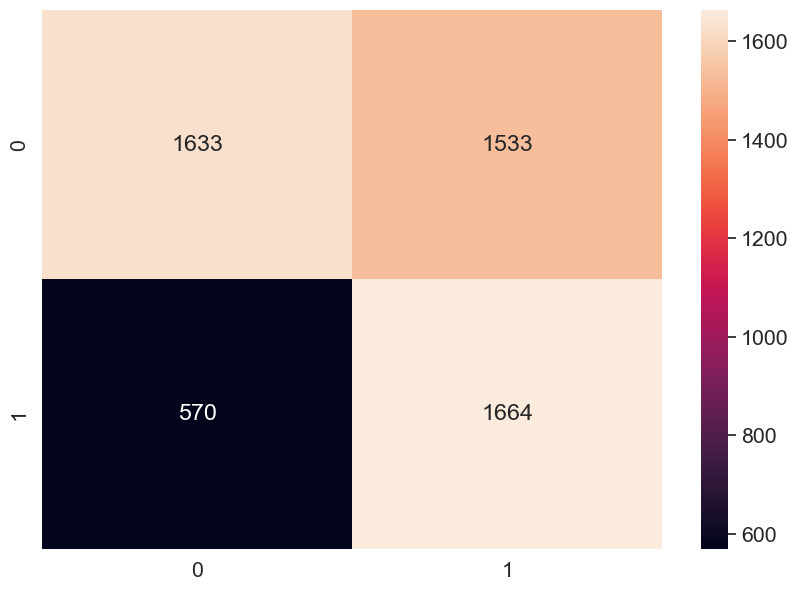

In [56]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred))

In [ ]:
## Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(
    estimator = classifier, 
    X = X_train, 
    y = y_train, 
    cv = 10
    )
